# Logistic Regression

This programming work is also related to Machine Learning by Stanford University at Coursera. In order to understand logistic regression deeper, I decided to realize it in Python.

In [12]:
import numpy as np
import scipy.io as sio 
import pylab as pl
%matplotlib inline

First, we need to define *sigmoid*, *cost* function. Note, *numpy* package can deal with *array*, and return *array*.

In [2]:
#Define sigmoid function
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [ ]:
#Define cost function, X stands for input matrix
#y stands for the labels
def costFunc(X, y, theta):
    '''Calculate the errors of logistic regression'''
    if X is None or y is None:
        print 'Empty Input For Cost!'
        return None
    if len(X.shape) == 1 and len(theta) !=1 :
        print 'The dimensions do not match!'
        return None
    if len(X) != len(y) or X.shape[1] != len(theta):
        print 'The dimensions do not match!'
        return None
    m = len(y)#Length of y
    H = np.dot(X, theta)
    #print H
    Z = sigmoid(H)
    #print Z
    if 0 in Z or 1 in Z:
        print 'Zero data for log function!'
        return None
    total = np.dot(y, np.log(Z)) + np.dot(1-y, np.log(1-Z))
    if m>0:
        total = total/m
    else:
        print 'Zero data!'
        return None
    return -total     

Then, we create a function to do gradient descending algorithms. The key part is to update parameters during each iteration.

In [19]:
#Update theta values
def trainLogisticRegression(X, y, alpha=0.01, num_iters=300):
    '''Update theta values'''
    #Deal with extreme cases
    if X is None or y is None:
        return None
    if len(X) != len(y):
        print 'The dimensions do not match!'
        return None 
    
    #Define some variables
    dim = X.shape
    sample_num = len(y)#the length of the samples
    feature_num = 0
    if dim>1:
        feature_num = X.shape[1]
    else:
        feature_num = 1
    sample_num = len(y)#Number of training cases
    input_train = np.insert(X, feature_num, 1, axis=1)#Insert the constant value
    theta = np.zeros(feature_num+1)
    feature_num = len(theta)#the number of features
    temp_theta = theta
    cost_iter = np.zeros(num_iters)#Record the cost each time
    
    #Iteration
    for i in range(num_iters):
        #Update theta during each iteration
        for j in range(feature_num):
            diff = sigmoid(np.dot(input_train, theta)) - y
            temp_theta[j] = theta[j] - alpha *  np.dot(diff, input_train[:, j])/sample_num
        theta = temp_theta
        #print theta
        cost_iter[i] = costFunc(input_train, y, theta)
    return theta, cost_iter

In order to check the performance of the algorithms, *predict* and *accuracy* functions are also needed. 

In [5]:
#Create a function to do predictions
def modelPredict(test, theta, threshold=0.5):
    '''Make predictions'''
    if len(test.shape) < 2:
        print 'The input has too few dimensions'
        return None
    feature_num = test.shape[1]
    sample_num = len(test)
    test = np.insert(test, feature_num, 1, axis=1)
    H = np.dot(test, theta)
    Z = sigmoid(H) 
    #print Z
    predictions = np.ones(sample_num)
    predictions[Z<threshold] = 0
    return predictions

In [88]:
#Calculate the accuracy
def accuracy(y, y_test):
    '''Calculate Accuracy'''
    return np.mean(y==y_test)

Load input files from the text, actually the data set was from materials of Machine Learning by Stanford University at Coursera.

In [6]:
file = open('ex2data1.txt')
data = []
for line in file:
    numbers = line.strip('\n').split(',')
    data.append(numbers)
data = np.float32(data)

In [7]:
data.shape

(100, 3)

We need to split data set into variables and outcome.

In [8]:
X = data[:, :2]
y = data[:, 2]

Have a look at the points in a 2D plot. Classes are distingushed by colors and shapes.

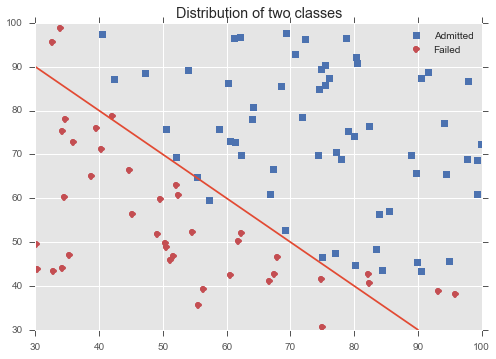

In [76]:
#sns.set(style="ticks", color_codes=True)
pos = X[y==1] #Data set belongs to Admitted
neg = X[y==0] #Data set belongs to Not Admitted
pl.style.use('ggplot')
point1 = pl.plot(pos[:, 0], pos[:, 1], 'bs', label='Admitted')
point2 = pl.plot(neg[:, 0], neg[:, 1], 'ro', label='Failed')
pl.plot([30, 90], [90, 30])
pl.title('Distribution of two classes')
pl.legend()

Now, let's do training work. In order to show the influence of the learning rate *alpha*, we pick several learning rates and compare the training performances.

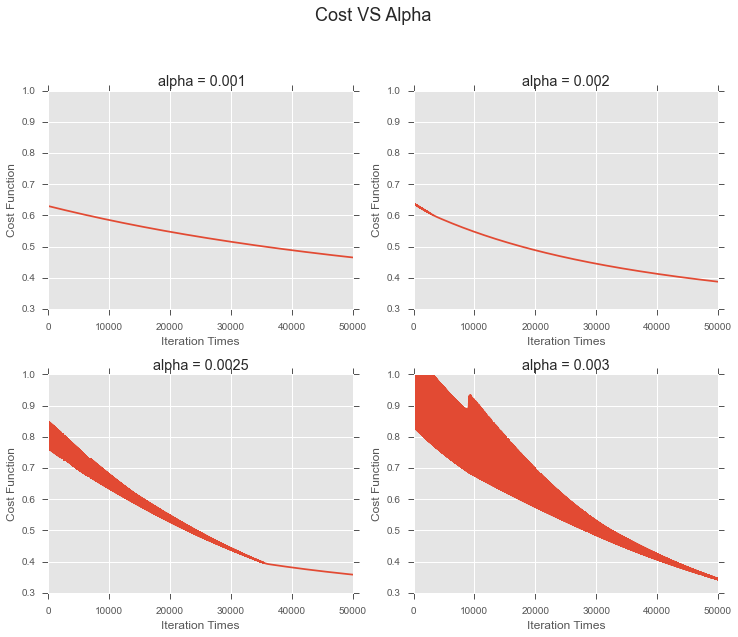

In [114]:
alphas = [0.001, 0.002, 0.0025, 0.003]
theta_list = []
cost_list = []
fig = pl.figure(figsize=(12,9))
for k, alpha in enumerate(alphas):
    [theta, costs] = trainLogisticRegression(X, y, alpha=alpha, num_iters=50000)
    theta_list.append(theta)
    cost_list.append(costs)
    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(costs)
    #ax.set_title('Descending of Cost Function')
    ax.set_title('alpha = %s'%(alpha))
    ax.set_xlabel('Iteration Times')
    ax.set_ylabel('Cost Function') 
    ax.set_ylim([0.3, 1])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=0.3)
fig.suptitle('Cost VS Alpha', fontsize=18, y=1.03)

It seems if *alpha*=0.001, the cost converged very slow, whereas if *alpha*=0.003, it fluctuates a little bit sharply. And compare to 0.002, if *alpha*=0.0025, the cost will be lower after 50000 iterations.

Let's analyse the result.

In [86]:
cost_list[2]

array([ 0.67790118,  0.67347506,  0.67190179, ...,  0.38735576,
        0.38735353,  0.3873513 ])

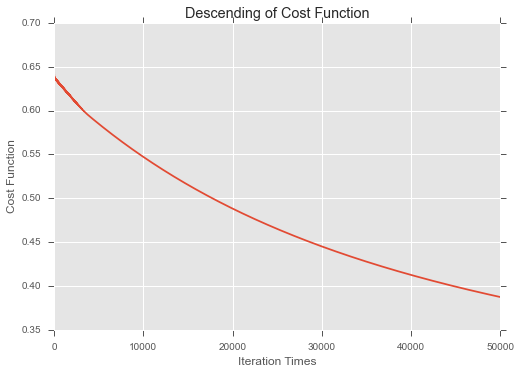

In [87]:
pl.plot(costs)
pl.xlabel('Iteration Times')
pl.ylabel('Cost Function')
pl.title('Descending of Cost Function')

In [81]:
theta

array([ 0.03399018,  0.02627732, -3.2973745 ])

In [89]:
y_hat = modelPredict(X, theta, threshold=0.5)
y_hat

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [83]:
y

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [90]:
accuracy(y, y_hat)

0.91000000000000003